## Dataset description
### Topic and origin:

High School Alcoholism and Academic Performance

The file student-lpor.csv contains data from a research study conducted by Fabio Pagnotta and Hossain Mohammad Amran, Università Di Camerino – UNICAM. This research was carried out with high school students and includes numerous social and gender-related variables, as well as grades in the Portuguese Language subject.

### Original task:
Based on the data from the files, you are to prepare a report presenting descriptive statistics (measures of central tendency, dispersion, and shape) and inferential statistics (measures of association and classification) for two or more related variables, along with the appropriate graphical representations.

In addition, you must conduct a study to introduce a new variable that classifies students as alcoholic or not. From there, identify which variables are predictors of this new response variable.

### Context:
The data was obtained from a survey conducted with high school students, providing extensive social and gender information, as well as grades in the Portuguese Language subject.

### Source Information:
P. Cortez and A. Silva. Using Data Mining to Predict the Performance of High School Students. In A. Brito and J. Teixeira (Eds.), Proceedings of 5th Future Business Technology Conference (FUBUTEC 2008), pp. 5-12, Porto, Portugal, April 2008, EUROSIS, ISBN 978-9077381-39-7.
Fabio Pagnotta, Hossain Mohammad Amran. Università Di Camerino - UNICAM.

### Labels:
school – student’s school (binary: GP - Gabriel Pereira or MS - Mousinho da Silveira)

sex – student’s gender (binary: 'F' - female or 'M' - male)

age – student’s age (numeric: 15 to 22)

address – type of home address (binary: 'U' - urban or 'R' - rural)

famsize – family size (binary: 'LE3' - less than or equal to 3 or 'GT3' - greater than 3)

Pstatus – parents’ cohabitation status (binary: 'T' - living together or 'A' - apart)

Medu – mother's education level (0 - none, 1 - primary education 1, 2 - primary education 2, 3 - secondary education, or 4 - higher education)

Fedu – father's education level (0 - none, 1 - primary education 1, 2 - primary education 2, 3 - secondary education, or 4 - higher education)

Mjob – mother's job (nominal: teacher, health, services, at_home, or other)

Fjob – father's job (nominal: teacher, health, services, at_home, or other)

reason – reason for choosing this school (nominal: home - close to home, reputation - school’s reputation, course - course preference, or other)

guardian – student’s guardian (nominal: mother, father, or other)

traveltime – home-to-school travel time (intervals: 1 - <15 min, 2 - 15–30 min, 3 - 30 min–1 hour, or 4 - >1 hour)

studytime – weekly study time (intervals: 1 - <2 hrs, 2 - 2–5 hrs, 3 - 5–10 hrs, or 4 - >10 hrs)

schoolsup – extra educational support (binary: yes or no)

famsup – family educational support (binary: yes or no)

paid – private lessons (binary: yes or no)

activities – participates in extracurricular activities (binary: yes or no)

nursery – attended preschool (binary: yes or no)

higher – wants to pursue higher education (binary: yes or no)

internet – Internet access at home (binary: yes or no)

romantic – in a romantic relationship (binary: yes or no)

famrel – quality of family relationships (categorical: 1 - very bad to 5 - excellent)

freetime – free time after school (categorical: 1 - very low to 5 - very high)

goout – time spent with friends (categorical: 1 - very low to 5 - very high)

Dalc – weekday alcohol consumption (categorical: 1 - very low to 5 - very high)

Walc – weekend alcohol consumption (categorical: 1 - very low to 5 - very high)

health – current health status (categorical: 1 - very bad to 5 - very good)

absences – number of school absences (numeric: 0 to 93)

These grades are related to the subject under study:

G1 – first semester grade (numeric: 0 to 20)

G2 – second semester grade (numeric: 0 to 20)




In [2]:
import sys
print(sys.executable)

d:\sdev\wwsi\arisa\MLOps-on-new-dataset\.venv\Scripts\python.exe


In [3]:
!pip install catboost matplotlib pandas scikit-learn kaggle optuna ipywidgets kaleido shap jupyterlab-rise nbformat loguru dotenv ruff flake8

     -------------------------------------- 102.5/102.5 MB 7.0 MB/s eta 0:00:00
     ---------------------------------------- 8.1/8.1 MB 8.4 MB/s eta 0:00:00
     ---------------------------------------- 11.3/11.3 MB 8.8 MB/s eta 0:00:00
     ---------------------------------------- 8.9/8.9 MB 8.9 MB/s eta 0:00:00
     -------------------------------------- 181.2/181.2 kB 5.3 MB/s eta 0:00:00
     -------------------------------------- 400.9/400.9 kB 8.3 MB/s eta 0:00:00
     -------------------------------------- 139.8/139.8 kB 4.2 MB/s eta 0:00:00
     ---------------------------------------- 66.3/66.3 kB ? eta 0:00:00
     -------------------------------------- 544.3/544.3 kB 8.6 MB/s eta 0:00:00
  Using cached jupyterlab_rise-0.43.1-py3-none-any.whl (16.4 MB)
  Using cached nbformat-5.10.4-py3-none-any.whl (78 kB)
  Using cached loguru-0.7.3-py3-none-any.whl (61 kB)
  Using cached dotenv-0.9.9-py2.py3-none-any.whl (1.9 kB)
     ---------------------------------------- 13.3/13.3 MB 


[notice] A new release of pip available: 22.2.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np

# Read the dataset 
df = pd.read_csv('../dataset/en_lpor_explorer.csv')
df_ids = df.pop('PassengerId') if 'PassengerId' in df.columns else pd.Series(range(len(df)))  # Create IDs if not present

# Sample some rows to examine the data
df.sample(10)

,School,Gender,Age,Housing_Type,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Work,Father_Work,...,Is_Dating,Good_Family_Relationship,Free_Time_After_School,Time_with_Friends,Alcohol_Weekdays,Alcohol_Weekends,Health_Status,School_Absence,Grade_1st_Semester,Grade_2nd_Semester
277,Gabriel Pereira,Female,17,Urban,Above 3,Living Together,Primary School,Primary School,other,Services,...,No,Good,Moderate,High,Very Low,Low,Very Good,4,11,10
553,Mousinho da Silveira,Male,17,Urban,Up to 3,Separated,Primary School,NaN,other,other,...,Yes,Good,Very Low,Low,Very Low,Very Low,Very Good,4,11,11
95,Gabriel Pereira,Female,15,Rural,Above 3,Living Together,Primary School,Primary School,Homemaker,other,...,No,Fair,Very Low,Low,Very Low,Very Low,Very Poor,4,13,13
182,Gabriel Pereira,Female,16,Urban,Above 3,Living Together,Lower Secondary School,Lower Secondary School,other,other,...,No,Excellent,Very Low,Very High,Very Low,Very Low,Good,0,12,12
605,Mousinho da Silveira,Female,19,Urban,Above 3,Living Together,Primary School,Primary School,Homemaker,Services,...,No,Excellent,Very High,Very High,Low,Moderate,Poor,0,5,0
487,Mousinho da Silveira,Female,18,Rural,Up to 3,Separated,High School,Lower Secondary School,other,other,...,Yes,Fair,Moderate,Low,Very Low,Very Low,Poor,6,7,9
612,Mousinho da Silveira,Male,17,Rural,Above 3,Living Together,Higher Education,High School,Services,other,...,Yes,Good,Very High,Very High,Very Low,Moderate,Poor,4,10,11
538,Mousinho da Silveira,Female,16,Rural,Up to 3,Living Together,Lower Secondary School,Lower Secondary School,other,other,...,Yes,Good,Moderate,Moderate,Low,Low,Very Good,2,11,11
563,Mousinho da Silveira,Male,17,Urban,Above 3,Living Together,Lower Secondary School,Lower Secondary School,other,other,...,Yes,Very Poor,Low,Very Low,Low,Moderate,Very Good,0,7,0
214,Gabriel Pereira,Female,16,Urban,Above 3,Living Together,Higher Education,High School,Health,other,...,No,Good,Moderate,Very High,Very Low,Very High,Poor,2,14,14


In [2]:
# Let's define target variable - creating a binary classification for alcoholism based on weekend alcohol consumption
# We'll consider values of 4-5 as "alcoholic" (1) and 1-3 as "non-alcoholic" (0)
df['Alcoholic'] = (df['Alcohol_Weekends'].isin(['High', 'Very High'])).astype(int)

# Drop original alcohol consumption columns since they would leak information
df = df.drop(['Alcohol_Weekdays', 'Alcohol_Weekends'], axis=1)

# Check data info
df.info()

# Handle categorical variables
categorical = [
    'School', 'Gender', 'Housing_Type', 'Family_Size', 'Parental_Status',
    'Mother_Education', 'Father_Education', 'Mother_Work', 'Father_Work',
    'Reason_School_Choice', 'Legal_Responsibility', 'Commute_Time',
    'Weekly_Study_Time', 'Extra_Educational_Support', 'Parental_Educational_Support',
    'Private_Tutoring', 'Extracurricular_Activities', 'Attended_Daycare',
    'Desire_Graduate_Education', 'Has_Internet', 'Is_Dating',
    'Good_Family_Relationship', 'Free_Time_After_School', 'Time_with_Friends',
    'Health_Status'
]

# Split features and target
y = df.pop('Alcoholic')
X = df

# Get indices of categorical columns
categorical_indices = [X.columns.get_loc(col) for col in categorical if col in X.columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   School                        649 non-null    object
 1   Gender                        649 non-null    object
 2   Age                           649 non-null    int64 
 3   Housing_Type                  649 non-null    object
 4   Family_Size                   649 non-null    object
 5   Parental_Status               649 non-null    object
 6   Mother_Education              643 non-null    object
 7   Father_Education              642 non-null    object
 8   Mother_Work                   649 non-null    object
 9   Father_Work                   649 non-null    object
 10  Reason_School_Choice          649 non-null    object
 11  Legal_Responsibility          649 non-null    object
 12  Commute_Time                  649 non-null    object
 13  Weekly_Study_Time   

In [ ]:
# Setup for model training with CatBoost
import joblib
import optuna
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool, cv
from pathlib import Path

outfolder = Path("results")
outfolder.mkdir(parents=True, exist_ok=True)

best_params_path = outfolder / "best_params.pkl"

# Handle NaN values
for col in categorical:
    X[col] = X[col].fillna('Unknown')

if not best_params_path.is_file():
    X_train_opt, X_val_opt, y_train_opt, y_val_opt = train_test_split(X, y, test_size=0.25, random_state=42)

    def objective(trial):
        params = {
            "depth": trial.suggest_int("depth", 2, 10),
            "learning_rate": trial.suggest_float("learning_rate", 1e-4, 0.3),
            "iterations": trial.suggest_int("iterations", 100, 300),
            "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1e-5, 100.0, log=True),
            "bagging_temperature": trial.suggest_float("bagging_temperature", 0.01, 1),
            "random_strength": trial.suggest_float("random_strength", 1e-5, 100.0, log=True)
        }
        model = CatBoostClassifier(**params, verbose=0)
        model.fit(X_train_opt, y_train_opt, 
                 eval_set=(X_val_opt, y_val_opt), 
                 cat_features=categorical_indices, 
                 early_stopping_rounds=50)
        
        return model.get_best_score()["validation"]["Logloss"]
    
    study = optuna.create_study(direction="minimize")

    study.optimize(objective, n_trials=50)
    
    joblib.dump(study.best_params, best_params_path)
    params = study.best_params
else:
    params = joblib.load(best_params_path)
print("Best Parameters:", params)

Best Parameters: {'depth': 3, 'learning_rate': 0.26974606242813, 'iterations': 228, 'l2_leaf_reg': 84.19872727894187, 'bagging_temperature': 0.6214702891909044, 'random_strength': 6.168430617325028}


In [ ]:
# Train final model with cross validation
params["eval_metric"] = "F1"
params["loss_function"] = "Logloss"

model = CatBoostClassifier(
    **params,
    verbose=True
)

data = Pool(X, y, cat_features=categorical_indices)

cv_results = cv(
    params=params,
    pool=data,
    fold_count=5,
    partition_random_seed=42,
    shuffle=True,
)

cv_results.to_csv(outfolder / "cv_results.csv", index=False)

Training on fold [0/5]
0:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 191ms	remaining: 43.3s
1:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 225ms	remaining: 25.4s
2:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 270ms	remaining: 20.3s
3:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 276ms	remaining: 15.5s
4:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 282ms	remaining: 12.6s
5:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 295ms	remaining: 10.9s
6:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 317ms	remaining: 10s
7:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 324ms	remaining: 8.91s
8:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 341ms	remaining: 8.31s
9:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 354ms	remaining: 7.73s
10:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 363ms	remaining: 7.16s
11:	learn: 0.0000000	test: 0.000

In [5]:
# Plot cross-validation results
import plotly.graph_objects as go

# Create F1 score plot
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=cv_results["iterations"], 
        y=cv_results["test-F1-mean"], 
        mode="lines", 
        name="Mean F1 Score", 
        line=dict(color="blue")
    )
)

fig.add_trace(
    go.Scatter(
        x=pd.concat([cv_results["iterations"], cv_results["iterations"][::-1]]),
        y=pd.concat([cv_results["test-F1-mean"]+cv_results["test-F1-std"], 
                     cv_results["test-F1-mean"]-cv_results["test-F1-std"]]),
        fill="toself", 
        fillcolor="rgba(0, 0, 255, 0.2)",
        line=dict(color="rgba(255, 255, 255, 0)"),
        showlegend=False
    )
)

fig.update_layout(
    title="Cross-Validation (N=5) Mean F1 score with Error Bands",
    xaxis_title="Training Steps",
    yaxis_title="Performance Score",
    template="plotly_white",
    yaxis=dict(range=[-0.1, 0.7])
)

fig.show()
fig.write_image(outfolder / "test_f1.png")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.0000000	total: 29ms	remaining: 6.59s
50:	learn: 0.5480769	total: 1.11s	remaining: 3.86s
50:	learn: 0.5480769	total: 1.11s	remaining: 3.86s
100:	learn: 0.6220096	total: 1.88s	remaining: 2.36s
100:	learn: 0.6220096	total: 1.88s	remaining: 2.36s
150:	learn: 0.6540284	total: 2.66s	remaining: 1.36s
150:	learn: 0.6540284	total: 2.66s	remaining: 1.36s
200:	learn: 0.6915888	total: 3.44s	remaining: 462ms
200:	learn: 0.6915888	total: 3.44s	remaining: 462ms
227:	learn: 0.7009346	total: 3.86s	remaining: 0us
227:	learn: 0.7009346	total: 3.86s	remaining: 0us


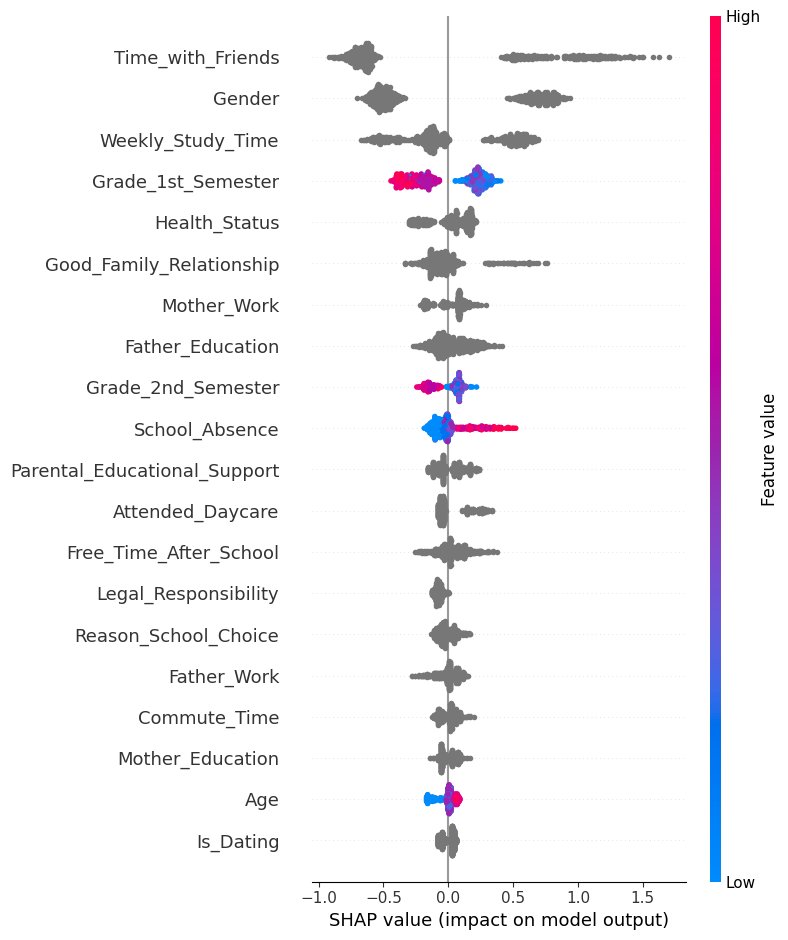

In [ ]:
# Train final model on full dataset
model.fit(
    X,
    y,
    verbose_eval=50,
    early_stopping_rounds=50,
    cat_features=categorical_indices,
    use_best_model=False,
    plot=True
)

model.save_model(outfolder / 'catboost_model_alcohol.cbm')
joblib.dump(params, outfolder / 'model_params.pkl')

# Generate SHAP values
import shap
import matplotlib.pyplot as plt
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

shap.summary_plot(shap_values, X, show=False)
plt.savefig(outfolder / "test_shap_overall.png")

# Save predictions
predictions = model.predict(X)
df_predictions = pd.DataFrame({
    'StudentId': df_ids,
    'Alcoholic': predictions
})
df_predictions.to_csv(outfolder / "predictions.csv", index=False)